# Spotiflow: finetuning on a new dataset

Let's first load all the libraries we're gonna need to finetune on a new dataset.

In [14]:
from spotiflow.model import Spotiflow, SpotiflowModelConfig, SpotiflowTrainingConfig
from spotiflow.sample_data import load_dataset
from spotiflow.utils import get_data

import matplotlib.pyplot as plt
import numpy as np

Then, we can load our dataset. For demonstration purposes, we will use the `MERFISH` dataset from _[Zhang et al. (2021)](https://doi.org/10.1038/s41586-021-03705-x)_ which we annotated ourselves. This dataset does not have many training images (12), and finetuning tends to be better than training from scratch when not a lot of training data is available, so it is a good example dataset for finetuning.

In [7]:
trX, trY, valX, valY, testX, testY = load_dataset("merfish", include_test=True)
# trX, trY, valX, valY, testX, testY = get_data("YOUR/DATA/PATH/HERE", include_test=True)

Loading images:   0%|          | 0/12 [00:00<?, ?it/s]

Loading centers:   0%|          | 0/12 [00:00<?, ?it/s]

Normalizing images:   0%|          | 0/12 [00:00<?, ?it/s]

Loading images:   0%|          | 0/6 [00:00<?, ?it/s]

Loading centers:   0%|          | 0/6 [00:00<?, ?it/s]

Normalizing images:   0%|          | 0/6 [00:00<?, ?it/s]

Loading images:   0%|          | 0/10 [00:00<?, ?it/s]

Loading centers:   0%|          | 0/10 [00:00<?, ?it/s]

Normalizing images:   0%|          | 0/10 [00:00<?, ?it/s]

As in [the first notebook](./1_train.ipynb), let's first visualize the data to make sure it is OK:

In [8]:
def plot_image_with_spots(img, spots, title=None, pred=False):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    clim = tuple(np.percentile(img, (1, 99.8)))
    axs.flat[0].imshow(img, clim=clim, cmap="gray")
    axs.flat[1].imshow(img, clim=clim, cmap="gray")
    axs.flat[1].scatter(spots[:,1], spots[:,0], facecolors='none', edgecolors='orange')
    
    axs.flat[0].axis("off")
    axs.flat[1].axis("off")
    if isinstance(title, str):
        title_subp0 = f"{title}"
        title_subp1 = f"{title} (w/ {'annotation' if not pred else 'prediction'})"
        axs.flat[0].set_title(title_subp0)
        axs.flat[1].set_title(title_subp1)
    return

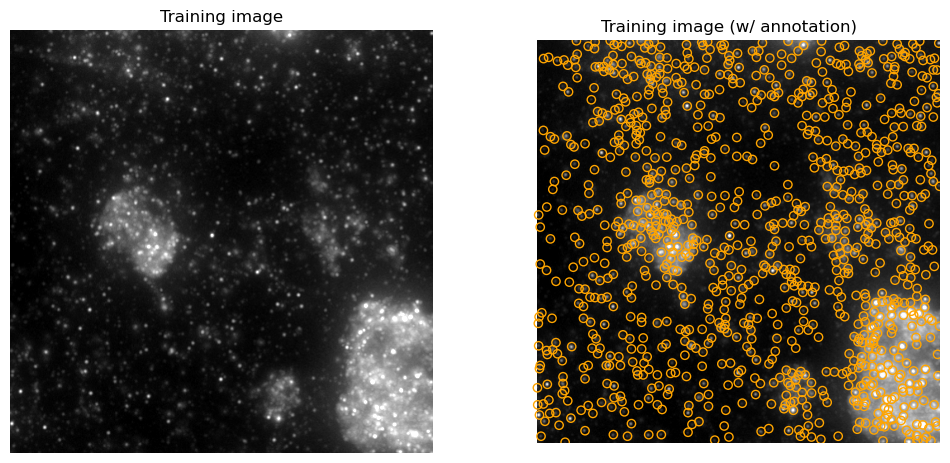

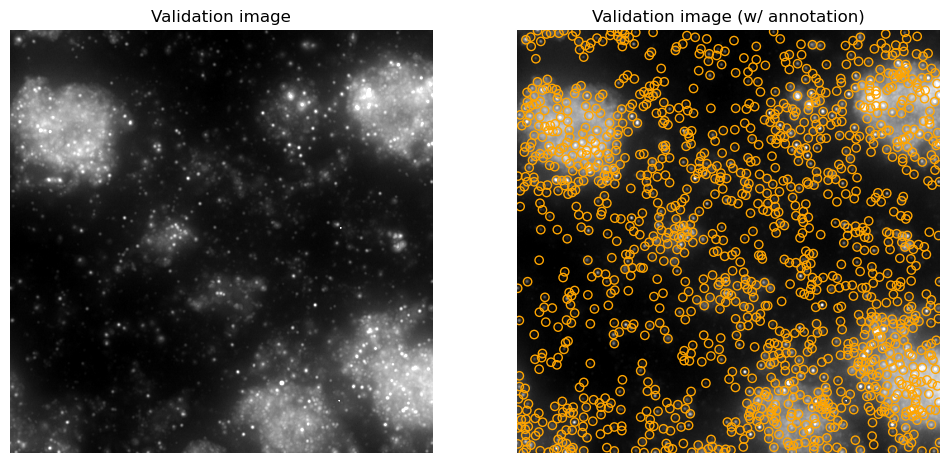

In [10]:
plot_image_with_spots(trX[0], trY[0], title="Training image")
plot_image_with_spots(valX[-1], valY[-1], title="Validation image")

Let's now load the model we will finetune. We will use the `synth_complex` model of Spotiflow, which is trained on realistically simulated synthetic data. Note that if it is your first time using this model, the model will be automatically downloaded (so the code snippet will take a little bit more to execute). If you went through the first notebook step by step, you can also uncomment the line and change the model folder to the one you trained!

In [12]:
model = Spotiflow.from_pretrained("synth_complex")
# model = Spotiflow.from_folder("YOUR_MODEL_FOLDER_HERE")

Loading pretrained model synth_complex
87896954/87896954 [==============================] - 12s 0us/step


We now can [follow the same steps as when training](./1_train.ipynb) to finetune the model! When finetuning, usually fewer epochs than when training from scratch should be used (in the paper we use 30 epochs when finetuning), so we change it in the training configuration. We also add a `finetuned_from` flag, which is not used by the code but is good practice to keep track of the models that are trained.

In [19]:
save_folder = "models/merfish_finetuned_from_synth" # change to where you want to store the model
train_config = SpotiflowTrainingConfig(
    num_epochs=30,
    finetuned_from="synth_complex"
)
model.fit(
    trX,
    trY,
    valX,
    valY,
    save_dir=save_folder,
    train_config=train_config,
)

INFO:spotiflow.model.spotiflow:Training config is: SpotiflowTrainingConfig(
	batch_size=4
	crop_size=512
	early_stopping_patience=0
	finetuned_from=None
	flow_loss_f=l1
	heatmap_loss_f=bce
	loss_levels=None
	lr=0.0003
	lr_reduce_patience=10
	num_epochs=30
	num_train_samples=None
	optimizer=adamw
	pos_weight=10.0
	smart_crop=False
)


Normalizing images:   0%|          | 0/12 [00:00<?, ?it/s]

Normalizing images:   0%|          | 0/6 [00:00<?, ?it/s]

INFO: GPU available: True (mps), used: True


INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (mps), used: True


INFO: TPU available: False, using: 0 TPU cores


INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores


INFO: IPU available: False, using: 0 IPUs


INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs


INFO: HPU available: False, using: 0 HPUs


INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:spotiflow.model.trainer:Creating logdir models/merfish_finetuned_from_synth and saving training config...


INFO: 
  | Name            | Type      | Params
----------------------------------------------
0 | model           | Spotiflow | 11.8 M
1 | _flow_loss_func | L1Loss    | 0     
----------------------------------------------
11.8 M    Trainable params
0         Non-trainable params
11.8 M    Total params
47.304    Total estimated model params size (MB)


INFO:lightning.pytorch.callbacks.model_summary:
  | Name            | Type      | Params
----------------------------------------------
0 | model           | Spotiflow | 11.8 M
1 | _flow_loss_func | L1Loss    | 0     
----------------------------------------------
11.8 M    Trainable params
0         Non-trainable params
11.8 M    Total params
47.304    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.273.


Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.259.


Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.248.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.244.


Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.233.


Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.227.


Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.222.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 00019: reducing learning rate of group 0 to 1.5000e-04.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30` reached.


INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:spotiflow.model.spotiflow:Will use device: mps:0


optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

INFO:spotiflow.model.spotiflow:Best threshold: 0.300
INFO:spotiflow.model.spotiflow:Best F1-score: 0.000
INFO:spotiflow.model.trainer:Saved last model with optimized thresholds.
INFO:spotiflow.model.spotiflow:Will use device: mps:0


optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

INFO:spotiflow.model.spotiflow:Best threshold: 0.484
INFO:spotiflow.model.spotiflow:Best F1-score: 0.857
INFO:spotiflow.model.trainer:Saved best model with optimized thresholds.
INFO:spotiflow.model.spotiflow:Training finished.


Let's quickly predict on a test image which was not seen when finetuning (see [the inference notebook](./2_inference.ipynb) for more information about predicting as well as model loading): 

INFO:spotiflow.model.spotiflow:Will use device: cpu
INFO:spotiflow.model.spotiflow:Predicting with prob_thresh = 0.484, min_distance = 1
INFO:spotiflow.model.spotiflow:Padding to shape (512, 512, 1)
INFO:spotiflow.model.spotiflow:Found 1965 spots


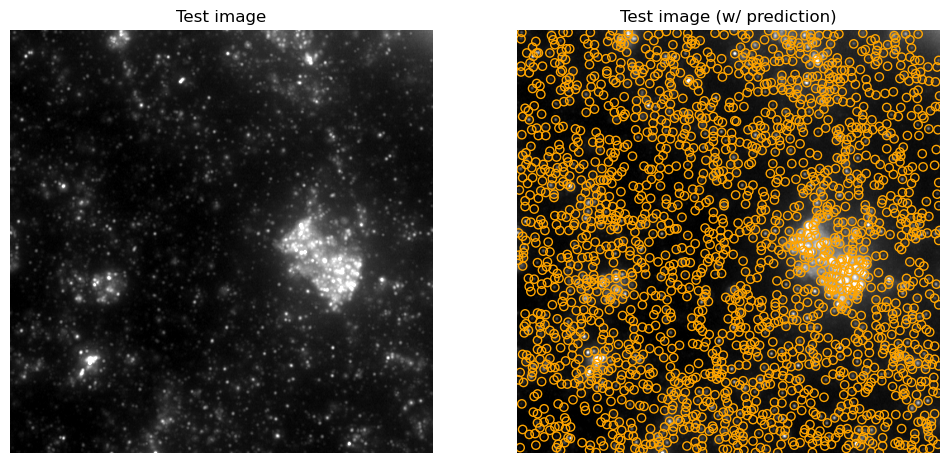

In [22]:
test_pred, _ = model.predict(testX[0])

plot_image_with_spots(testX[0], test_pred, title="Test image", pred=True)